In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_columns = 999
data = pd.read_csv('D:\Data\kaggle datasets\movie_IMDB.csv')

In [2]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
data.shape

(5043, 28)

In [4]:
data.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [6]:
numerical_features = data.select_dtypes(exclude=['object']).columns
categorical_features = data.select_dtypes(include=['object']).columns

In [7]:
num_data = data[numerical_features]

In [8]:
num_data.shape

(5043, 16)

In [9]:
num_data.isnull().sum().sort_values(ascending = False)

gross                        884
budget                       492
aspect_ratio                 329
title_year                   108
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_facebook_likes        23
num_user_for_reviews          21
duration                      15
actor_2_facebook_likes        13
facenumber_in_poster          13
actor_1_facebook_likes         7
movie_facebook_likes           0
imdb_score                     0
cast_total_facebook_likes      0
num_voted_users                0
dtype: int64

In [10]:
num_data.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,NaN,131.0,NaN,131.0,NaN,8,143,0.0,NaN,NaN,NaN,12.0,7.1,NaN,0


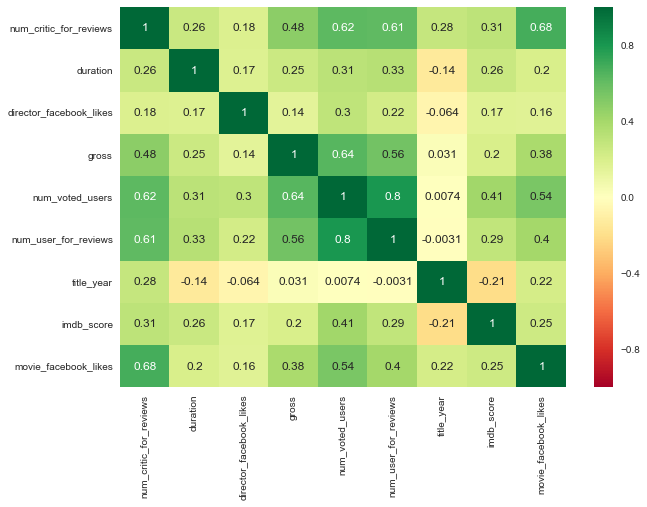

In [11]:
# most correlated features
import seaborn as sns
corrmat = num_data.corr()
plt.figure(figsize = (10,7))
# or fig, ax = plt.subplots(figsize=(20, 10))
top_corr_features = corrmat.index[abs(corrmat["imdb_score"])>0.1]
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#g = sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [12]:
corrmat.index[abs(corrmat['imdb_score']) > 0.1].tolist()

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'gross',
 'num_voted_users',
 'num_user_for_reviews',
 'title_year',
 'imdb_score',
 'movie_facebook_likes']

In [13]:
num_data = num_data[['num_critic_for_reviews',
 'duration',
 'gross',
 'num_voted_users',
 'imdb_score',
 'movie_facebook_likes']]

In [14]:
num_data.head()

,num_critic_for_reviews,duration,gross,num_voted_users,imdb_score,movie_facebook_likes
0,723.0,178.0,760505847.0,886204,7.9,33000
1,302.0,169.0,309404152.0,471220,7.1,0
2,602.0,148.0,200074175.0,275868,6.8,85000
3,813.0,164.0,448130642.0,1144337,8.5,164000
4,NaN,NaN,NaN,8,7.1,0


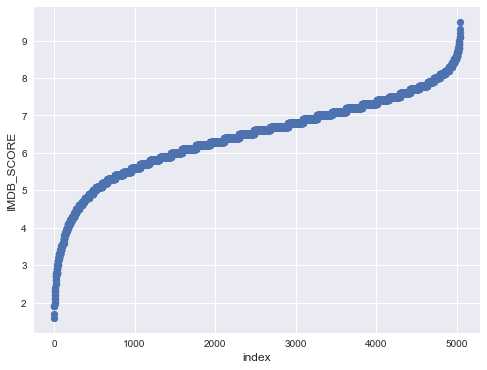

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(range(num_data.shape[0]), np.sort(num_data.imdb_score.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('IMDB_SCORE', fontsize=12)
plt.show()

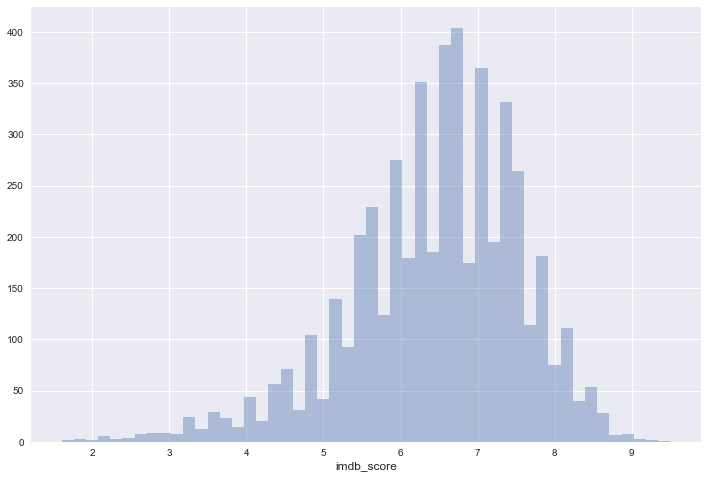

In [16]:
plt.figure(figsize=(12,8))
sns.distplot(num_data.imdb_score.values, bins=50, kde=False)
plt.xlabel('imdb_score', fontsize=12)
plt.show()

In [17]:
num_data.columns.tolist()

['num_critic_for_reviews',
 'duration',
 'gross',
 'num_voted_users',
 'imdb_score',
 'movie_facebook_likes']

IndexError: index 2 is out of bounds for axis 0 with size 2

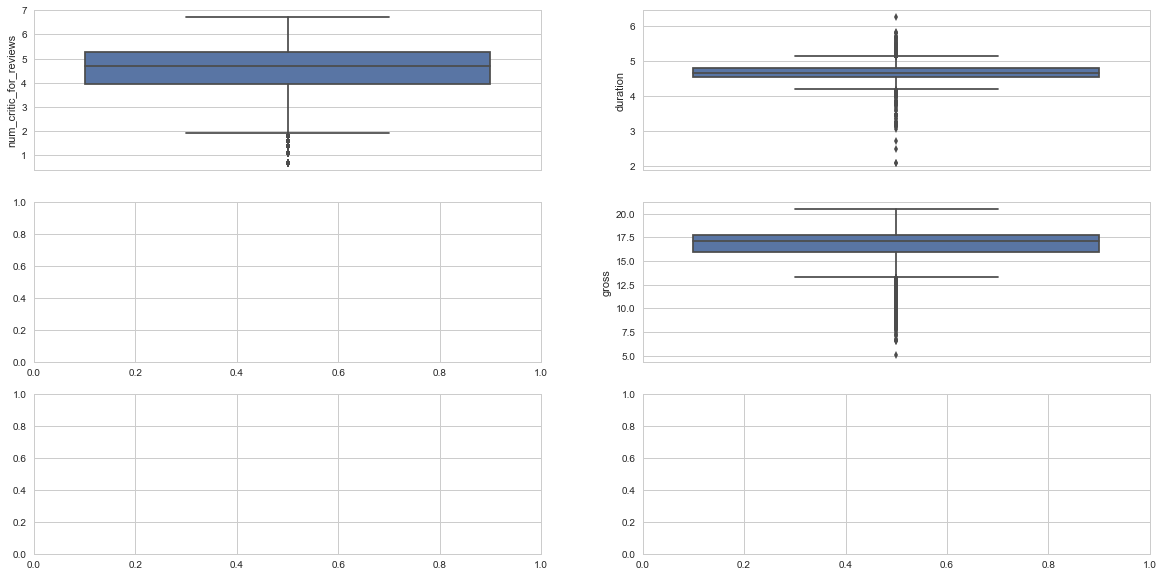

In [100]:
fig, ax = plt.subplots(figsize=(20,10), ncols=2, nrows=3)
sns.set_style("whitegrid")
#sns.boxplot(x="imdb_score", data=num_data,orient = 'v',ax = ax[0][0])
sns.boxplot(x="num_critic_for_reviews", data=num_data,orient = 'v',ax = ax[0][0])
sns.boxplot(x="duration", data=num_data,orient = 'v',ax = ax[0][1])
#sns.boxplot(x="director_facebook_likes", data=num_data,orient = 'v',ax = ax[1][0])
sns.boxplot(x="gross", data=num_data,orient = 'v',ax = ax[1][0])
sns.boxplot(x="num_voted_users", data=num_data,orient = 'v',ax = ax[1][1])
#sns.boxplot(x="num_user_for_reviews", data=num_data,orient = 'v',ax = ax[2][0])
#sns.boxplot(x="title_year", data=num_data,orient = 'v',ax = ax[2][1])
sns.boxplot(x="movie_facebook_likes", data=num_data,orient = 'v',ax = ax[2][1])


In [19]:
num_data.isnull().sum().sort_values(ascending = False)

gross                     884
num_critic_for_reviews     50
duration                   15
movie_facebook_likes        0
imdb_score                  0
num_voted_users             0
dtype: int64

In [20]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(num_data, alpha=0.2, figsize=(10, 10), diagonal='kde')

C:\Users\jinda\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\jinda\Anaconda2\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


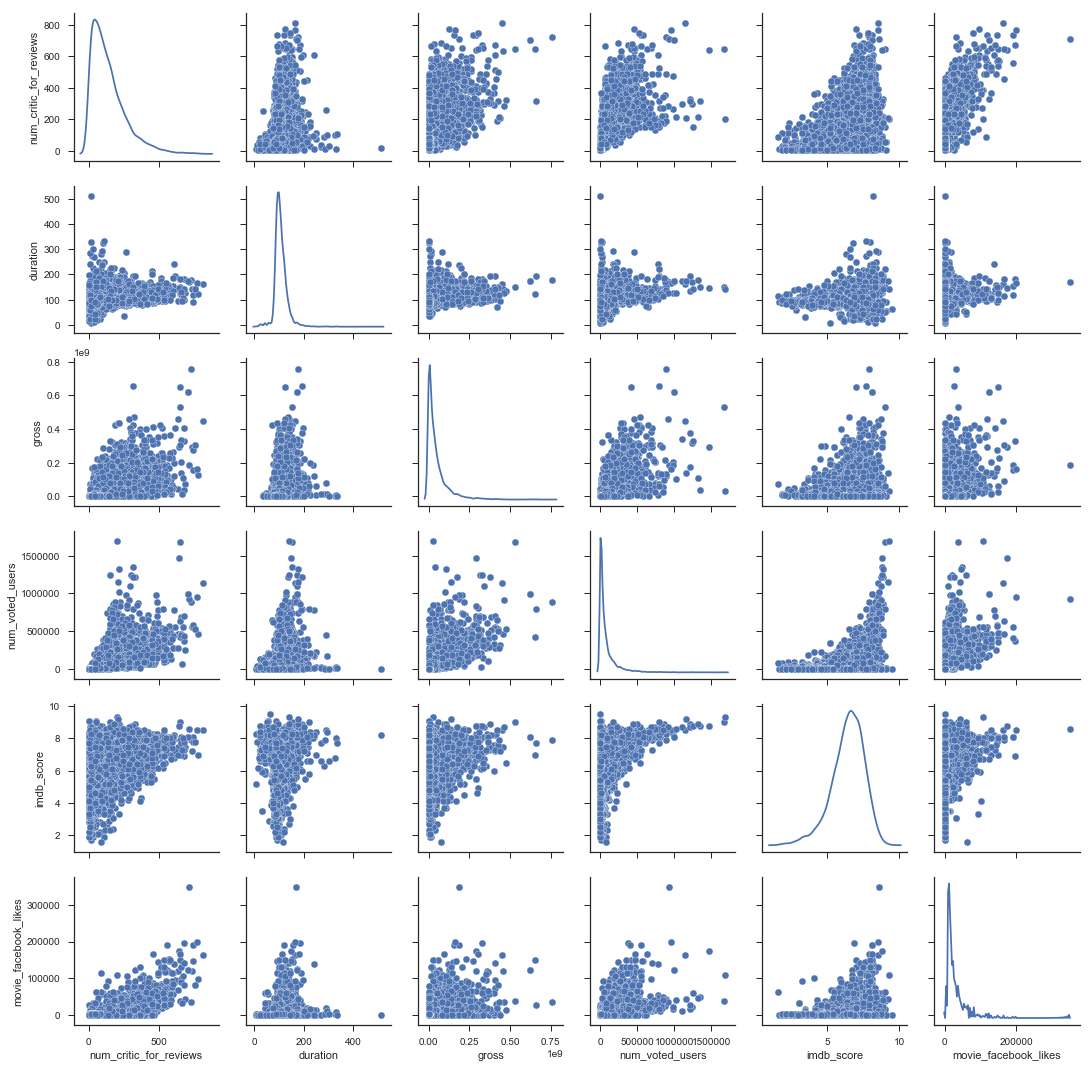

In [21]:
sns.set(style="ticks")
sns.pairplot(num_data,diag_kind="kde")

In [22]:
num_data.median()

num_critic_for_reviews         110.0
duration                       103.0
gross                     25517500.0
num_voted_users              34359.0
imdb_score                       6.6
movie_facebook_likes           166.0
dtype: float64

In [23]:
num_data.fillna(num_data.median(),inplace = True)

,num_critic_for_reviews,duration,gross,num_voted_users,imdb_score,movie_facebook_likes
0,723.0,178.0,760505847.0,886204,7.9,33000
1,302.0,169.0,309404152.0,471220,7.1,0
2,602.0,148.0,200074175.0,275868,6.8,85000
3,813.0,164.0,448130642.0,1144337,8.5,164000
4,110.0,103.0,25517500.0,8,7.1,0
5,462.0,132.0,73058679.0,212204,6.6,24000
6,392.0,156.0,336530303.0,383056,6.2,0
7,324.0,100.0,200807262.0,294810,7.8,29000
8,635.0,141.0,458991599.0,462669,7.5,118000
9,375.0,153.0,301956980.0,321795,7.5,10000


In [24]:
import numpy as np

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1)
    upper_bound = quartile_3 + (iqr * 1)
    return np.where((ys > upper_bound) | (ys < lower_bound))

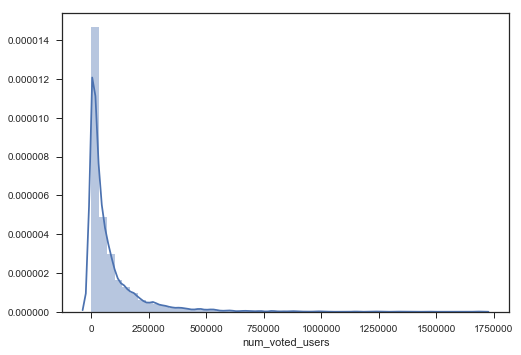

In [25]:
sns.distplot(num_data['num_voted_users'])

In [26]:
test = outliers_iqr(num_data['num_voted_users'])

In [27]:
# c=np.intersect1d(num_data.index.values,test)

In [28]:
c=np.setxor1d(num_data.index.values,test)

In [29]:
c.size

4403

In [30]:
num_data_filtered = num_data.loc[c]

In [31]:
num_data_filtered.shape

(4403, 6)

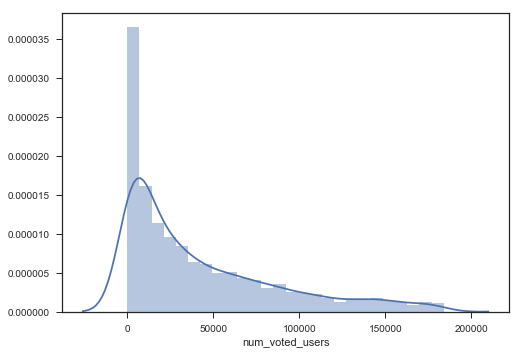

In [32]:
sns.distplot(num_data_filtered['num_voted_users'])

In [33]:
num_data.isnull().any()

num_critic_for_reviews    False
duration                  False
gross                     False
num_voted_users           False
imdb_score                False
movie_facebook_likes      False
dtype: bool

In [34]:
num_data_filtered.head()

,num_critic_for_reviews,duration,gross,num_voted_users,imdb_score,movie_facebook_likes
4,110.0,103.0,25517500.0,8,7.1,0
14,450.0,150.0,89289910.0,181792,6.5,48000
16,258.0,150.0,141614023.0,149922,6.6,0
24,251.0,113.0,70083519.0,149019,6.1,0
38,525.0,130.0,234903076.0,175409,6.4,60000


In [35]:
num_data.drop(['imdb_score'],inplace = True,axis = 1)

In [36]:
from scipy.stats import skew 
skewness = num_data.apply(lambda x: skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.5]
skewness.index

Index([u'num_critic_for_reviews', u'duration', u'gross', u'num_voted_users',
       u'movie_facebook_likes'],
      dtype='object')

In [37]:
skew_features = num_data[skewness.index]
skew_features  = np.log1p(skew_features)
num_data[skewness.index] = skew_features

In [38]:
num_data.head()

,num_critic_for_reviews,duration,gross,num_voted_users,movie_facebook_likes
0,6.584791,5.187386,20.449494,13.694704,10.404293
1,5.713733,5.135798,19.550159,13.063082,0.000000
2,6.401917,5.003946,19.114199,12.527681,11.350418
3,6.701960,5.105945,19.920595,13.950337,12.007628
4,4.709530,4.644391,17.054875,2.197225,0.000000


In [39]:
categorical_features

Index([u'color', u'director_name', u'actor_2_name', u'genres', u'actor_1_name',
       u'movie_title', u'actor_3_name', u'plot_keywords', u'movie_imdb_link',
       u'language', u'country', u'content_rating'],
      dtype='object')

In [40]:
cat_data = data[categorical_features]

In [41]:
cat_data.head()

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,Color,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13
4,NaN,Doug Walker,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN


In [42]:
cat_data.isnull().sum()

color               19
director_name      104
actor_2_name        13
genres               0
actor_1_name         7
movie_title          0
actor_3_name        23
plot_keywords      153
movie_imdb_link      0
language            12
country              5
content_rating     303
dtype: int64

In [43]:
cat_data['color'].value_counts(),cat_data['language'].value_counts()[:5]

(Color               4815
  Black and White     209
 Name: color, dtype: int64, English     4704
 French        73
 Spanish       40
 Hindi         28
 Mandarin      26
 Name: language, dtype: int64)

In [44]:
cat_data.fillna(value = 'NULL',inplace = True)

C:\Users\jinda\Anaconda2\lib\site-packages\pandas\core\frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [45]:
cat_data.isnull().sum()

color              0
director_name      0
actor_2_name       0
genres             0
actor_1_name       0
movie_title        0
actor_3_name       0
plot_keywords      0
movie_imdb_link    0
language           0
country            0
content_rating     0
dtype: int64

In [46]:
df_genres = pd.DataFrame(cat_data['genres'])
df_genres = pd.DataFrame(df_genres.genres.str.split('|').tolist(),columns = ["Genre_"+str(i) for i in  range(0,8)] )
cat_data.drop('genres',inplace = True, axis = 1)
cat_data = cat_data.merge(df_genres,left_index = True,right_index = True)

C:\Users\jinda\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
df_genres = pd.DataFrame(cat_data['plot_keywords'])
df_genres = pd.DataFrame(df_genres.plot_keywords.str.split('|').tolist(),columns = ["plot_keywords_"+str(i) for i in  range(0,5)] )
cat_data.drop('plot_keywords',inplace = True, axis = 1)
cat_data = cat_data.merge(df_genres,left_index = True,right_index = True)

In [48]:
cat_data.head()

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,movie_imdb_link,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,plot_keywords_0,plot_keywords_1,plot_keywords_2,plot_keywords_3,plot_keywords_4
0,Color,James Cameron,Joel David Moore,CCH Pounder,Avatar,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None,avatar,future,marine,native,paraplegic
1,Color,Gore Verbinski,Orlando Bloom,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13,Action,Adventure,Fantasy,None,None,None,None,None,goddess,marriage ceremony,marriage proposal,pirate,singapore
2,Color,Sam Mendes,Rory Kinnear,Christoph Waltz,Spectre,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13,Action,Adventure,Thriller,None,None,None,None,None,bomb,espionage,sequel,spy,terrorist
3,Color,Christopher Nolan,Christian Bale,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13,Action,Thriller,None,None,None,None,None,None,deception,imprisonment,lawlessness,police officer,terrorist plot
4,NULL,Doug Walker,Rob Walker,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NULL,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NULL,NULL,NULL,Documentary,None,None,None,None,None,None,None,NULL,None,None,None,None


In [49]:
cat_data.drop(['movie_imdb_link','Genre_6','Genre_7'],inplace = True, axis = 1)

In [50]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
color              5043 non-null object
director_name      5043 non-null object
actor_2_name       5043 non-null object
actor_1_name       5043 non-null object
movie_title        5043 non-null object
actor_3_name       5043 non-null object
language           5043 non-null object
country            5043 non-null object
content_rating     5043 non-null object
Genre_0            5043 non-null object
Genre_1            4410 non-null object
Genre_2            3055 non-null object
Genre_3            1427 non-null object
Genre_4            446 non-null object
Genre_5            97 non-null object
plot_keywords_0    5043 non-null object
plot_keywords_1    4849 non-null object
plot_keywords_2    4818 non-null object
plot_keywords_3    4789 non-null object
plot_keywords_4    4751 non-null object
dtypes: object(20)
memory usage: 788.0+ KB


In [51]:
cat_data.head()

,color,director_name,actor_2_name,actor_1_name,movie_title,actor_3_name,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,plot_keywords_0,plot_keywords_1,plot_keywords_2,plot_keywords_3,plot_keywords_4
0,Color,James Cameron,Joel David Moore,CCH Pounder,Avatar,Wes Studi,English,USA,PG-13,Action,Adventure,Fantasy,Sci-Fi,None,None,avatar,future,marine,native,paraplegic
1,Color,Gore Verbinski,Orlando Bloom,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,English,USA,PG-13,Action,Adventure,Fantasy,None,None,None,goddess,marriage ceremony,marriage proposal,pirate,singapore
2,Color,Sam Mendes,Rory Kinnear,Christoph Waltz,Spectre,Stephanie Sigman,English,UK,PG-13,Action,Adventure,Thriller,None,None,None,bomb,espionage,sequel,spy,terrorist
3,Color,Christopher Nolan,Christian Bale,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,English,USA,PG-13,Action,Thriller,None,None,None,None,deception,imprisonment,lawlessness,police officer,terrorist plot
4,NULL,Doug Walker,Rob Walker,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NULL,NULL,NULL,NULL,Documentary,None,None,None,None,None,NULL,None,None,None,None


In [52]:
cat_data.nunique()

color                 3
director_name      2399
actor_2_name       3033
actor_1_name       2098
movie_title        4917
actor_3_name       3522
language             48
country              66
content_rating       19
Genre_0              21
Genre_1              24
Genre_2              23
Genre_3              17
Genre_4              16
Genre_5              11
plot_keywords_0    2064
plot_keywords_1    2434
plot_keywords_2    2560
plot_keywords_3    2449
plot_keywords_4    2228
dtype: int64

In [53]:
cat_data['director_name'].nunique(),cat_data['actor_2_name'].nunique(),cat_data['actor_1_name'].nunique(),cat_data['movie_title'].nunique(),cat_data['Genre_0'].nunique()

(2399, 3033, 2098, 4917, 21)

In [54]:
cat_data.columns.tolist()

['color',
 'director_name',
 'actor_2_name',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'language',
 'country',
 'content_rating',
 'Genre_0',
 'Genre_1',
 'Genre_2',
 'Genre_3',
 'Genre_4',
 'Genre_5',
 'plot_keywords_0',
 'plot_keywords_1',
 'plot_keywords_2',
 'plot_keywords_3',
 'plot_keywords_4']

In [55]:
cat_data['plot_keywords_4'].nunique()

2228

In [56]:
cat_data.drop(['color',
 'director_name',
 'actor_2_name',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords_0',
 'plot_keywords_1',
 'plot_keywords_2',
 'plot_keywords_3',
 'plot_keywords_4'],inplace = True, axis = 1)

In [57]:
cat_data.head()

,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5
0,English,USA,PG-13,Action,Adventure,Fantasy,Sci-Fi,None,None
1,English,USA,PG-13,Action,Adventure,Fantasy,None,None,None
2,English,UK,PG-13,Action,Adventure,Thriller,None,None,None
3,English,USA,PG-13,Action,Thriller,None,None,None,None
4,NULL,NULL,NULL,Documentary,None,None,None,None,None


In [58]:
cat_data.drop(['Genre_4','Genre_5'],inplace = True, axis = 1)

In [59]:
cat_data.head()

,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3
0,English,USA,PG-13,Action,Adventure,Fantasy,Sci-Fi
1,English,USA,PG-13,Action,Adventure,Fantasy,None
2,English,UK,PG-13,Action,Adventure,Thriller,None
3,English,USA,PG-13,Action,Thriller,None,None
4,NULL,NULL,NULL,Documentary,None,None,None


In [60]:
cat_data_out = cat_data.loc[c]

In [61]:
cat_data_out.shape

(4403, 7)

In [62]:
from sklearn import preprocessing
cat_data_ordinal = cat_data_out.apply(preprocessing.LabelEncoder().fit_transform)
# le = preprocessing.LabelEncoder()
# le.fit(cat_data.as_matrix())
# cat_data_ordinal = le.transform(X_train)

In [63]:
cat_data_ordinal.shape

(4403, 7)

In [64]:
cat_data_ordinal.head()

,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3
4,28,37,5,6,0,0,0
14,11,63,8,0,1,23,0
16,11,63,7,0,1,7,5
24,11,63,8,1,8,8,0
38,11,63,7,1,8,8,0


In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=None, svd_solver="full")
pca.fit(StandardScaler().fit_transform(num_data))
# X_train = pca.transform(X_train)
# pca_data = pca.transform(num_data)
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

In [66]:
cum_var_exp

array([ 0.45133845,  0.64382406,  0.81937034,  0.9622672 ,  1.        ])

In [67]:
std_num_data = StandardScaler().fit_transform(num_data)

In [68]:
merged = pd.concat([num_data,cat_data_ordinal], axis =1)

In [69]:
merged.head()

,num_critic_for_reviews,duration,gross,num_voted_users,movie_facebook_likes,language,country,content_rating,Genre_0,Genre_1,Genre_2,Genre_3
0,6.584791,5.187386,20.449494,13.694704,10.404293,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.713733,5.135798,19.550159,13.063082,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.401917,5.003946,19.114199,12.527681,11.350418,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.701960,5.105945,19.920595,13.950337,12.007628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.709530,4.644391,17.054875,2.197225,0.000000,28.0,37.0,5.0,6.0,0.0,0.0,0.0


In [70]:
cat_data_out.isnull().any()

language          False
country           False
content_rating    False
Genre_0           False
Genre_1            True
Genre_2            True
Genre_3            True
dtype: bool

In [71]:
cat_data_one_hot = pd.get_dummies(cat_data_out)

In [72]:
cat_data_one_hot.shape

(4403, 217)

In [73]:
num_data_filtered.head()

,num_critic_for_reviews,duration,gross,num_voted_users,imdb_score,movie_facebook_likes
4,110.0,103.0,25517500.0,8,7.1,0
14,450.0,150.0,89289910.0,181792,6.5,48000
16,258.0,150.0,141614023.0,149922,6.6,0
24,251.0,113.0,70083519.0,149019,6.1,0
38,525.0,130.0,234903076.0,175409,6.4,60000


In [74]:
num_data_filtered.drop(['imdb_score','movie_facebook_likes','num_critic_for_reviews'],axis = 1,inplace = True)

In [75]:
std_num_data = StandardScaler().fit_transform(num_data_filtered)

In [76]:
std_num_data[:,0]

array([-0.06786272,  1.91317551,  1.91317551, ..., -1.20590597,
       -0.19431197, -0.61580947])

In [77]:
cat_data_one_hot['new_3'] = std_num_data[:,2]




In [78]:
cat_data_one_hot['new_2'] = std_num_data[:,1]
cat_data_one_hot['new_1'] = std_num_data[:,0]

In [79]:
cat_data_one_hot.head()

,language_Aboriginal,language_Arabic,language_Aramaic,language_Bosnian,language_Cantonese,language_Chinese,language_Czech,language_Danish,language_Dari,language_Dutch,language_Dzongkha,language_English,language_Filipino,language_French,language_German,language_Greek,language_Hebrew,language_Hindi,language_Hungarian,language_Icelandic,language_Indonesian,language_Italian,language_Japanese,language_Kannada,language_Kazakh,language_Korean,language_Mandarin,language_Mongolian,language_NULL,language_None,language_Norwegian,language_Panjabi,language_Persian,language_Polish,language_Portuguese,language_Romanian,language_Russian,language_Slovenian,language_Spanish,language_Swahili,language_Swedish,language_Tamil,language_Telugu,language_Thai,language_Urdu,language_Vietnamese,language_Zulu,country_Afghanistan,country_Argentina,country_Aruba,country_Australia,country_Bahamas,country_Belgium,country_Brazil,country_Bulgaria,country_Cambodia,country_Cameroon,country_Canada,country_Chile,country_China,country_Colombia,country_Czech Republic,country_Denmark,country_Dominican Republic,country_Egypt,country_Finland,country_France,country_Georgia,country_Germany,country_Greece,country_Hong Kong,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Israel,country_Italy,country_Japan,country_Kenya,country_Kyrgyzstan,country_Libya,country_Mexico,country_NULL,country_Netherlands,country_New Line,country_New Zealand,country_Nigeria,country_Norway,country_Official site,country_Pakistan,country_Panama,country_Peru,country_Philippines,country_Poland,country_Romania,country_Russia,country_Slovakia,country_Slovenia,country_South Africa,country_South Korea,country_Soviet Union,country_Spain,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_Turkey,country_UK,country_USA,country_United Arab Emirates,country_West Germany,content_rating_Approved,content_rating_G,content_rating_GP,content_rating_M,content_rating_NC-17,content_rating_NULL,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_TV-14,content_rating_TV-G,content_rating_TV-MA,content_rating_TV-PG,content_rating_TV-Y,content_rating_TV-Y7,content_rating_Unrated,content_rating_X,Genre_0_Action,Genre_0_Adventure,Genre_0_Animation,Genre_0_Biography,Genre_0_Comedy,Genre_0_Crime,Genre_0_Documentary,Genre_0_Drama,Genre_0_Family,Genre_0_Fantasy,Genre_0_Film-Noir,Genre_0_Game-Show,Genre_0_History,Genre_0_Horror,Genre_0_Music,Genre_0_Musical,Genre_0_Mystery,Genre_0_Romance,Genre_0_Sci-Fi,Genre_0_Thriller,Genre_0_Western,Genre_1_Adventure,Genre_1_Animation,Genre_1_Biography,Genre_1_Comedy,Genre_1_Crime,Genre_1_Documentary,Genre_1_Drama,Genre_1_Family,Genre_1_Fantasy,Genre_1_Film-Noir,Genre_1_History,Genre_1_Horror,Genre_1_Music,Genre_1_Musical,Genre_1_Mystery,Genre_1_News,Genre_1_Reality-TV,Genre_1_Romance,Genre_1_Sci-Fi,Genre_1_Short,Genre_1_Sport,Genre_1_Thriller,Genre_1_War,Genre_1_Western,Genre_2_Animation,Genre_2_Biography,Genre_2_Comedy,Genre_2_Crime,Genre_2_Documentary,Genre_2_Drama,Genre_2_Family,Genre_2_Fantasy,Genre_2_Film-Noir,Genre_2_History,Genre_2_Horror,Genre_2_Music,Genre_2_Musical,Genre_2_Mystery,Genre_2_News,Genre_2_Reality-TV,Genre_2_Romance,Genre_2_Sci-Fi,Genre_2_Short,Genre_2_Sport,Genre_2_Thriller,Genre_2_War,Genre_2_Western,Genre_3_Comedy,Genre_3_Crime,Genre_3_Drama,Genre_3_Family,Genre_3_Fantasy,Genre_3_History,Genre_3_Horror,Genre_3_Music,Genre_3_Musical,Genre_3_Mystery,Genre_3_News,Genre_3_Romance,Genre_3_Sci-Fi,Genre_3_Sport,Genre_3_Thriller,Genre_3_War,Genre_3_Western,new_3,new_2,new_1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [80]:
# merged1 = pd.concat([df,cat_data_one_hot], axis =1)

In [81]:
# merged1_std = StandardScaler().fit_transform(merged1)

In [83]:
target = data.loc[c]['imdb_score']

In [84]:
target.shape

(4403L,)

In [85]:
from sklearn.model_selection import train_test_split # to split the data into two parts
X_train,X_test,y_train,y_test = train_test_split(cat_data_one_hot,target, random_state = 0)

In [86]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


#lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3
lasso_cv = LassoCV(alphas=alphas, random_state=0)
# lasso_cv = Lasso(alpha = 0.001)
lasso_cv.fit(X_train, y_train)
lasso_cv.score(X_test, y_test)
#lasso_cv.predict(X_test)

0.36108417950274263

In [87]:
#decision tree
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor()
dt.fit(X_train, y_train)
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)

('Training score: ', 0.88470486654738867)
('Testing score: ', 0.31242029208676114)


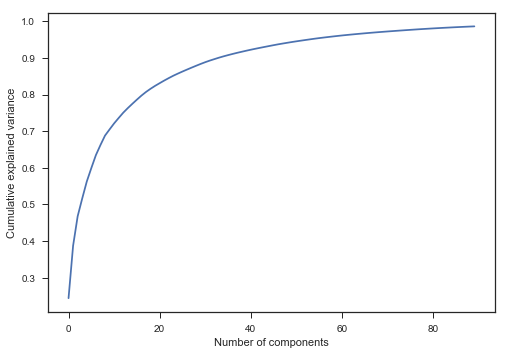

In [88]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 90).fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [89]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.24429399,  0.3873758 ,  0.46778251,  0.51630594,  0.562571  ,
        0.59938474,  0.63473391,  0.6622312 ,  0.68801621,  0.70484016,
        0.72132838,  0.73613026,  0.75051754,  0.76305116,  0.77479554,
        0.78619282,  0.79725186,  0.807165  ,  0.81587155,  0.8238505 ,
        0.8311316 ,  0.83828731,  0.84504257,  0.85148421,  0.85731682,
        0.86287162,  0.86824648,  0.87351139,  0.8786428 ,  0.88365843,
        0.88840163,  0.89276529,  0.89675369,  0.90067174,  0.9042782 ,
        0.90764716,  0.91086226,  0.9139242 ,  0.91682008,  0.91966705,
        0.9224036 ,  0.92500883,  0.9275266 ,  0.92998309,  0.9324063 ,
        0.93480886,  0.93712834,  0.93927153,  0.94134067,  0.94338004,
        0.94529043,  0.94713554,  0.94895235,  0.95072283,  0.95245647,
        0.95408981,  0.95561336,  0.95710078,  0.95852855,  0.95993652,
        0.96127713,  0.96253936,  0.96374388,  0.9649324 ,  0.9660617 ,
        0.96717363,  0.96824517,  0.96927644,  0.97027238,  0.97

In [90]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [91]:
#decision tree
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor()
dt.fit(X_train_pca, y_train)
dt_score_train = dt.score(X_train_pca, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test_pca, y_test)
print("Testing score: ",dt_score_test)

('Training score: ', 0.88238846947437355)
('Testing score: ', 0.31050999393891954)


In [93]:
y_test_ = lasso_cv.predict(X_test)


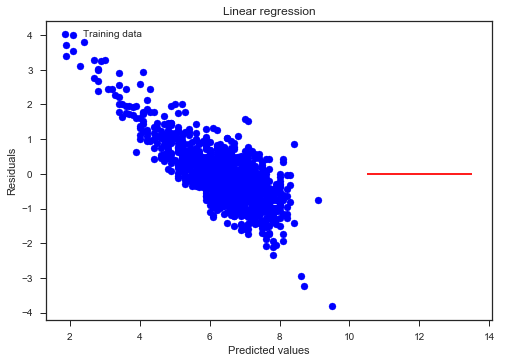

In [94]:
plt.scatter(y_test, y_test_ - y_test, c = "blue",  label = "Training data")
#plt.scatter(y_test_rdg,y_test_rdg - y_test, c = "green",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()